<div style="text-align: center;">
    <h1>Exploratory Data Analysis on Superstore Sales Dataset</h1>
</div>

## 1. Introduction

The "Superstore Sales" dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final), is a comprehensive and versatile collection of data that provides valuable insights into sales, customer behavior, and product performance. This dataset offers a rich resource for in-depth analysis, encompassing information from diverse regions and segments.

### 1.1 Dataset Overview

The dataset consists of various features, including order details, customer information, product categories, and sales metrics. With 9994 entries and 21 columns, it captures a wide range of transactions, allowing us to delve into the dynamics of sales operations, customer interactions, and the factors influencing business success.

### 1.2 Metadata

Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product.

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.


### 1.3 Objectives

The primary goals of this exploratory data analysis (EDA) are as follows:

1. **Understand the Structure:** Explore the general structure of the dataset, including data types, missing values, and overall distribution.
2. **Temporal Analysis:** Investigate sales trends over time to identify patterns and potential seasonality.
3. **Geographical Insights:** Analyze sales distribution across different regions, countries, and cities.
4. **Customer Behavior:** Gain insights into customer demographics, buying patterns, and segments.
5. **Product and Category Analysis:** Explore product performance, category-wise sales, and profitability.
6. **Sales and Profitability:** Examine overall sales, profitability distribution, and factors influencing profits.
7. **Segment and Shipping Analysis:** Evaluate the impact of customer segments and shipping modes on sales and satisfaction.
8. **Discount Influence:** Analyze the effect of discounts on sales, quantity, and profit.
9. **Correlation and Outlier Analysis:** Investigate relationships between variables and identify outliers.
10. **Visualization:** Utilize visualizations to enhance the understanding of trends, patterns, and correlations within the dataset.

By thoroughly exploring these aspects, we aim to uncover actionable insights that can inform business strategies, optimize pricing, and enhance customer engagement.

Let's embark on this EDA journey to unravel the story within the "Superstore Sales" dataset!

## 2. Data Loading and Inspection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SuperstoreSales.csv", encoding='ISO-8859-1')

### Encoding Selection Explanation

When attempting to read the CSV file 'Superstore_Sales.csv' using the default encoding ('utf-8'), a `UnicodeDecodeError` was encountered. This error occurs when there are characters in the file that cannot be decoded using the specified encoding.

To address this issue, an alternative encoding, 'ISO-8859-1' was chosen. This encoding is more permissive and can handle a broader range of characters, making it suitable for cases where the default UTF-8 encoding fails.

By using 'ISO-8859-1', we aim to successfully read the CSV file without encountering decoding errors, ensuring that all characters are properly interpreted during the import process.

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 3. Data Cleaning 

### 3.1 Identify Missing Values 

In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 3.2 Handling Duplicates 

In [9]:
print("Is there any duplicate rows?", df.duplicated().any())

Is there any duplicate rows? False


### 3.3 Data Types and Conversion 

In [10]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [11]:
# Convert Order Date and Ship Date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y', errors='coerce')
# The errors='coerce' parameter is used to handle cases where the conversion might fail,
# and it replaces those cases with NaT (Not a Time)

print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


### 3.4 Dataframe Reorder 

In [12]:
# Sort the DataFrame by "Order Date" and "Order ID"
df = df.sort_values(by=['Order Date', 'Order ID'])

# Reset index after sorting
df = df.reset_index(drop=True)

# Now the DataFrame is sorted by "Order Date" and "Order ID"
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [13]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
9990,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176
9991,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
9992,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
9993,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


### 3.5 Drop Unneccesary columns

In [14]:
df.drop('Row ID', axis=1, inplace=True)

In [15]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512


## Temporal Analysis

### 1. **Overall Sales Trend:** 

- What is the overall trend in sales over the entire time period of the dataset?
- Can we identify any significant upward or downward trends in sales?

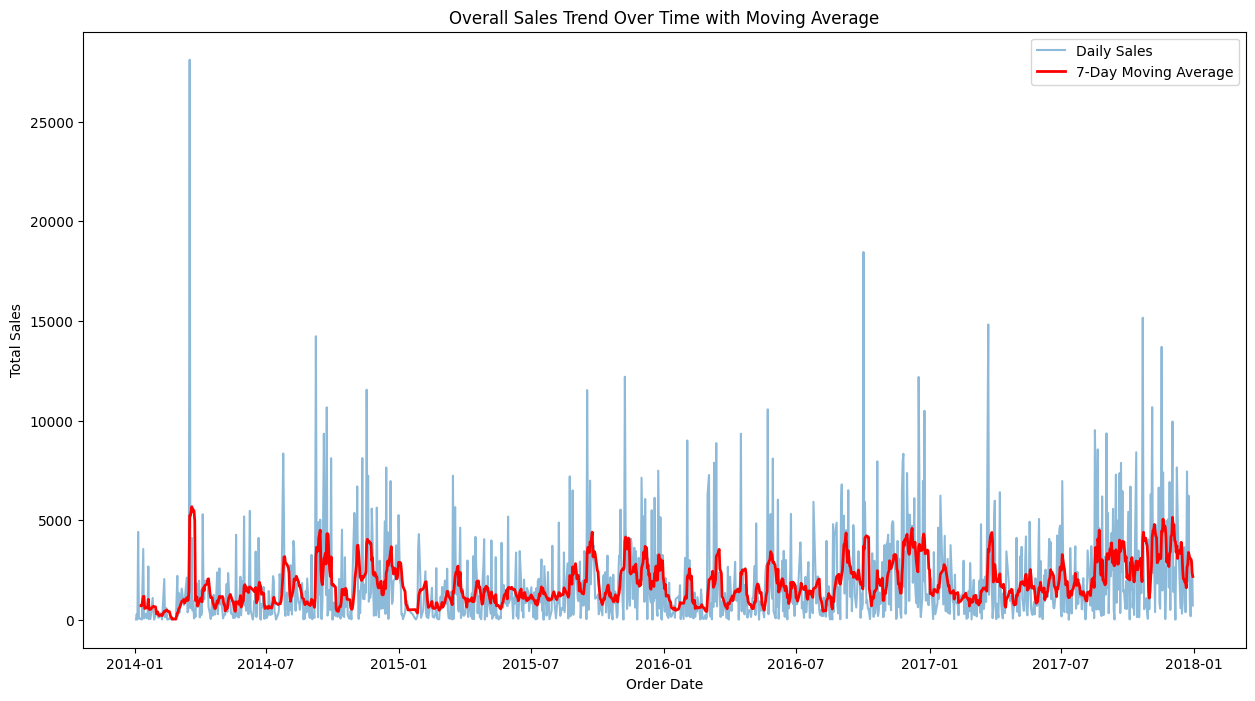

In [37]:
# Group data by 'Order Date' and calculate total sales for each date
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Calculate a 7-day moving average to smooth the sales data
daily_sales['Sales_MA'] = daily_sales['Sales'].rolling(window=7).mean()

# Plotting the overall sales trend with a larger figure size and a moving average
plt.figure(figsize=(15, 8))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Daily Sales', alpha=0.5)
plt.plot(daily_sales['Order Date'], daily_sales['Sales_MA'], label='7-Day Moving Average', color='red', linewidth=2)
plt.title('Overall Sales Trend Over Time with Moving Average')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

### Observation:

The comprehensive analysis of the overall sales trend reveals a dynamic pattern characterized by multiple spikes occurring at different points in time.

**Lack of Consistent Increasing Trend:**
Interestingly, there is no discernible consistent upward trajectory in sales observed over the entire duration of the dataset.

**Identification of High Sales Spikes:**
Contrastingly, the analysis highlights specific periods marked by significantly high spikes in sales, indicating concentrated bursts of heightened purchasing activity.

**Potential Factors for Spikes:**
These spikes in sales may be attributed to various factors such as targeted promotions, seasonal influences, or specific events that drove notable surges in consumer engagement during those particular periods.

**Consider Further Analysis:**
To gain a more nuanced understanding, a focused exploration into the time periods associated with pronounced spikes would be beneficial. This additional analysis could unveil valuable insights into the underlying factors contributing to these intermittent peaks in sales activity.

In summary, while a sustained increasing sales trend is not evident, the presence of notable spikes prompts further investigation to uncover the contextual factors influencing these concentrated bursts of heightened sales activity. Such insights can inform strategic decisions and targeted initiatives to capitalize on favorable market conditions.

### 2. Day-of-Week Analysis:

- What is the distribution of sales across different days of the week?
- Are certain days associated with higher sales volumes?

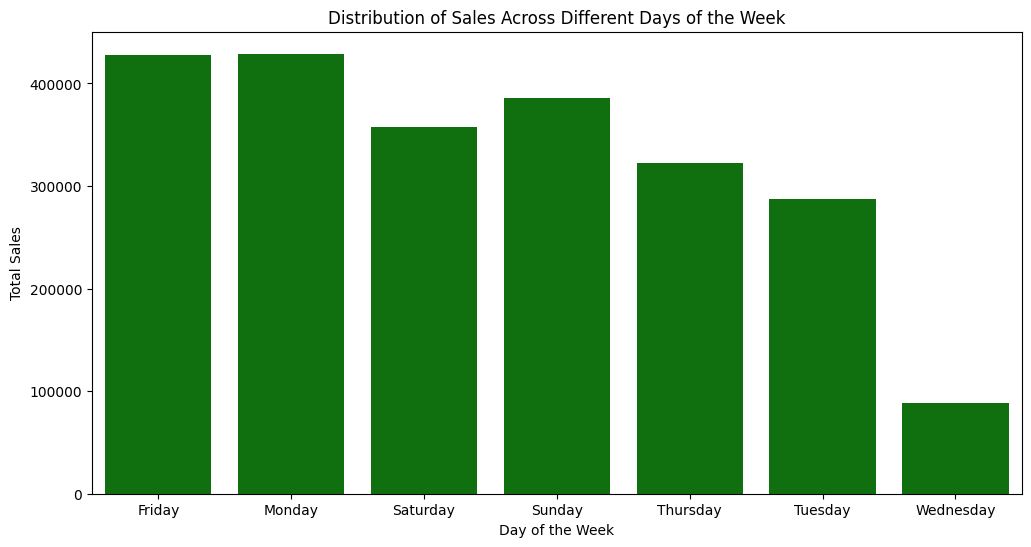

Total Sales of each day:


Day of Week
Friday       427692.2593
Monday       428937.8157
Saturday     357984.6830
Sunday       385353.8464
Thursday     321965.7785
Tuesday      287209.5022
Wednesday     88056.9752
Name: Sales, dtype: float64

In [17]:
# Extract day of the week from 'Order Date'
df['Day of Week'] = df['Order Date'].dt.day_name()

# Analyze the distribution of sales across different days of the week
sales_by_day = df.groupby('Day of Week')['Sales'].sum()

# Visualize the distribution of sales by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day, color='green')
plt.title('Distribution of Sales Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# Print the exact sales of each day
print("Total Sales of each day:")
display(sales_by_day)

# Drop the Day of Week column after use
df.drop('Day of Week', axis=1, inplace=True)

### Observation:

- Fridays exhibit the highest sales volume among the weekdays, followed by Mondays and Thursdays.
- Saturdays show a substantial but lower sales volume compared to weekdays.
- Sundays have the lowest sales volume, which might be indicative of lower consumer activity on this day.

### Recommendation:
Consider focusing marketing efforts or promotions on days with historically higher sales volumes, such as Fridays and Mondays, to maximize potential revenue.

### 3. Monthly Sales Variation:
- How do sales vary on a monthly basis?
- Are there specific seasons or recurring cycles with increased sales activity?

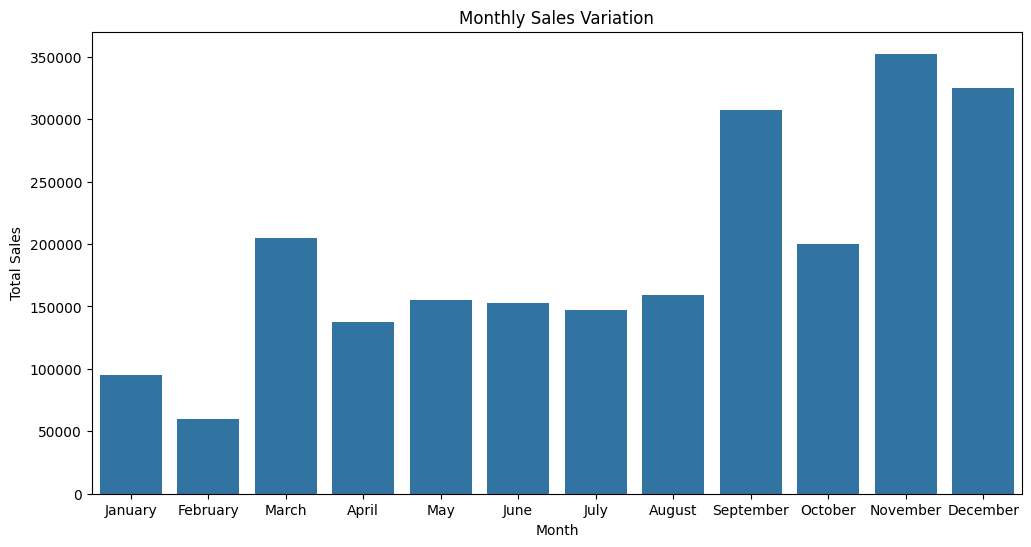

Total Sales of each month:


Month
January       94924.8356
February      59751.2514
March        205005.4888
April        137762.1286
May          155028.8117
June         152718.6793
July         147238.0970
August       159044.0630
September    307649.9457
October      200322.9847
November     352461.0710
December     325293.5035
Name: Sales, dtype: float64

In [18]:
# Extract month from 'Order Date'
df['Month'] = df['Order Date'].dt.month_name()

# Convert 'Month' to a categorical type with natural order
df['Month'] = pd.Categorical(df['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Analyze the variation of sales on a monthly basis
sales_by_month = df.groupby('Month')['Sales'].sum()

# Visualize the monthly variation in sales
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month)
plt.title('Monthly Sales Variation')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Print the exact sales of each month
print("Total Sales of each month:")
display(sales_by_month)

# Drop the month column after use
df.drop('Month', axis=1, inplace=True)

### Observations:

- November emerges as the month with the highest sales volume, likely influenced by factors such as Black Friday and holiday shopping.
- December follows closely, showcasing strong holiday season shopping trends.
- February and January exhibit lower sales, potentially reflecting reduced consumer spending post the holiday season.
- The overall pattern indicates fluctuations in sales throughout the year, with specific months consistently outperforming others.

### Recommendation:

Understanding the seasonality and patterns in monthly sales can guide strategic planning. Consider targeted marketing efforts, promotions, and inventory management based on observed trends to maximize revenue throughout the year.

### 4. Yearly Performance:
- How has the sales performance evolved on a yearly basis?
- Are there specific years with notable growth or decline in sales?

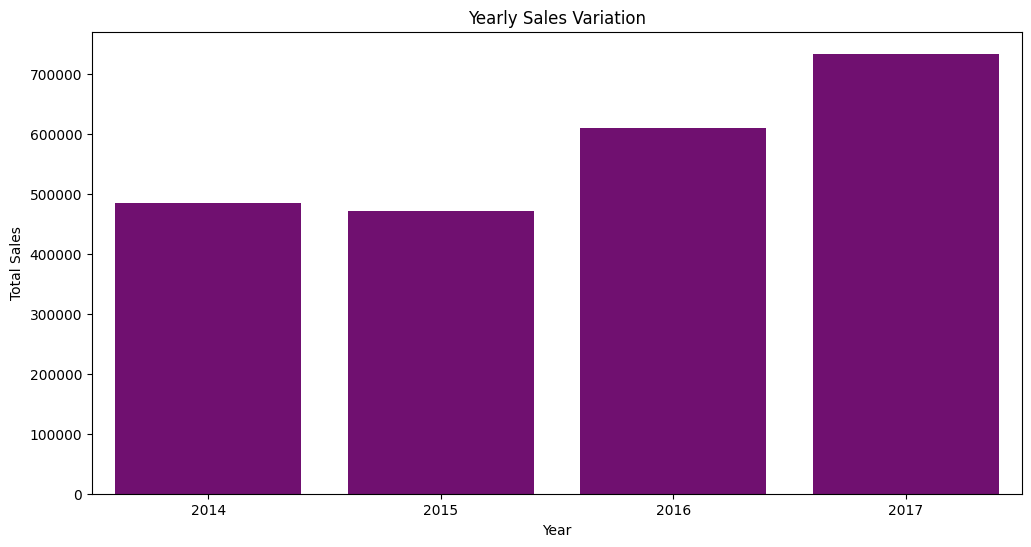

Total Sales of each year:


Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

In [19]:
# Extract year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Analyze the variation of sales on a yearly basis
sales_by_year = df.groupby('Year')['Sales'].sum()

# Visualize the yearly variation in sales
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_year.index, y=sales_by_year, color='purple')
plt.title('Yearly Sales Variation')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

# Print the exact sales of each year
print("Total Sales of each year:")
display(sales_by_year)

# Drop the Year column after use
df.drop('Year', axis=1, inplace=True)

### Observation:

The analysis of yearly sales variation reveals insights into the evolution of sales performance over the years.

### Trends:

- **2014 to 2015:** A slight decrease in sales from 2014 to 2015.
- **2015 to 2016:** A notable increase in sales, indicating a potential recovery or strategic improvements.
- **2016 to 2017:** Another substantial growth in sales, reaching the highest recorded sales in 2014.

### Insights:

- The year 2015 experienced a dip in sales, which could be a critical period for further investigation.
- The subsequent years, particularly 2016 and 2017, show positive growth, suggesting successful strategies or market improvements.

### Recommendation:

- Further exploration into the factors influencing the dip in 2015 could provide valuable insights for strategic planning.
- Continued analysis of sales trends will be crucial for adapting strategies and sustaining positive growth.

### 5. Order Processing Time Trends:
   - How has the average order processing time changed over time?
   - Are there trends or patterns in the time taken to process and ship orders?

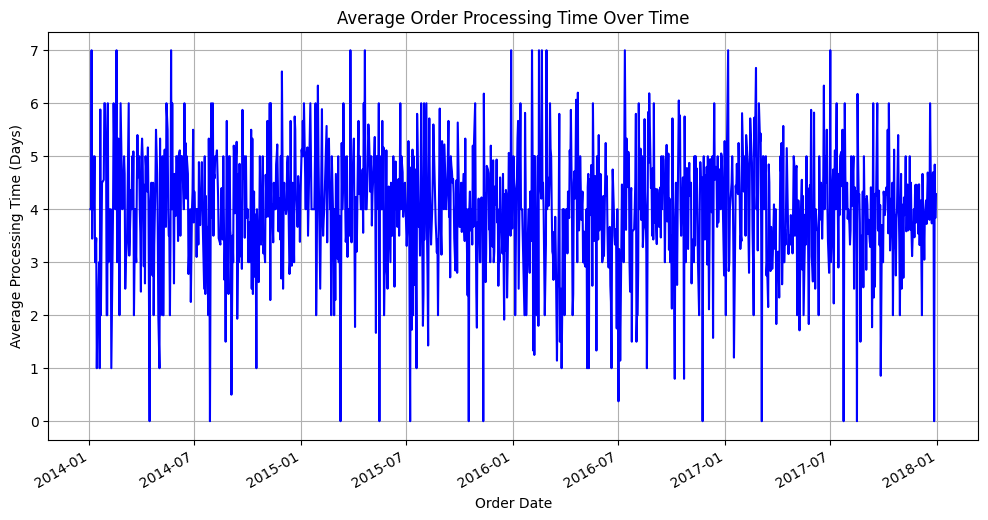

In [20]:
# Calculate order processing time
df['Order Processing Time'] = df['Ship Date'] - df['Order Date']

# Convert order processing time to days (if needed)
df['Order Processing Time'] = df['Order Processing Time'].dt.days

# Group by order date and calculate average order processing time
avg_processing_time = df.groupby('Order Date')['Order Processing Time'].mean()

# Plotting the trend of average order processing time over time
avg_processing_time.plot(kind='line', figsize=(12, 6), color='blue', linestyle='-')
plt.title('Average Order Processing Time Over Time')
plt.xlabel('Order Date')
plt.ylabel('Average Processing Time (Days)')
plt.grid(True)
plt.show()

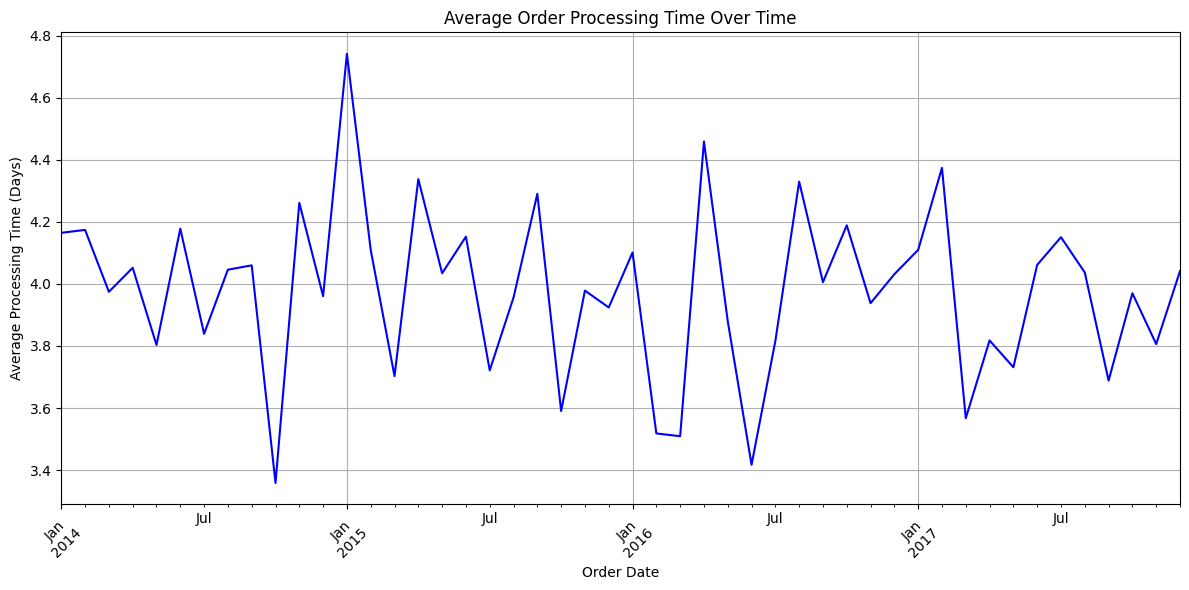

Monthly average more than 4.3 days:
Order Date
2015-01-31    4.741379
2015-04-30    4.337500
2016-04-30    4.458824
2016-08-31    4.329545
2017-02-28    4.373832
Name: Order Processing Time, dtype: float64

 Monthly average less than 3 days:
Order Date
2014-10-31    3.358491
2015-10-31    3.590361
2016-02-29    3.518072
2016-03-31    3.509202
2016-06-30    3.417085
2017-03-31    3.567227
Name: Order Processing Time, dtype: float64


In [21]:
# Calculate order processing time
df['Order Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by month and calculate average order processing time
monthly_avg_processing_time = df.resample('M', on='Order Date')['Order Processing Time'].mean()

# Plotting the trend of average order processing time over time
plt.figure(figsize=(12, 6))
monthly_avg_processing_time.plot(kind='line', color='blue', linestyle='-')
plt.title('Average Order Processing Time Over Time')
plt.xlabel('Order Date')
plt.ylabel('Average Processing Time (Days)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print('Monthly average more than 4.3 days:')
print(monthly_avg_processing_time[monthly_avg_processing_time > 4.3])
print('\n Monthly average less than 3 days:')
print(monthly_avg_processing_time[monthly_avg_processing_time < 3.6])

**Why Monthly Resampling?**

1. **Data Density**: The original daily dataset has many data points, resulting in cluttered visuals.

2. **Easier Interpretation**: Resampling to monthly averages simplifies the visualization by reducing data density.

3. **Clear Trends**: Monthly intervals offer a clearer overview of trends without overwhelming detail.

### Observation:

The analysis of monthly order processing time variation reveals insights into the trends and patterns of order processing efficiency over different months. Key observations include:

- Fluctuations in processing time: The average order processing time exhibits fluctuations across different months and years.
- Periods of higher processing time: Certain months, such as January 2015, April 2016 and February 2017, show relatively higher average processing times, suggesting potential bottlenecks or inefficiencies during these periods.
- Periods of lower processing time: Conversely, months like October 2014, March 2016 and June 2016 exhibit lower average processing times, indicating improved efficiency or streamlined processes during these times.

### Trends:

- The average order processing time shows some fluctuations across different months and years.
- Months such as January 2015, April 2016 and February 2017 have relatively higher average processing times, indicating potential bottlenecks or inefficiencies during these periods.
- On the other hand, months like October 2014, March 2016 and June 2016 exhibit lower average processing times, suggesting improved efficiency or streamlined processes during these times.

### Insights:

- Identifying the factors contributing to longer processing times in certain months could help in optimizing processes and reducing delays.
- Analyzing the patterns of lower processing times could uncover successful strategies or practices that can be replicated in other months to improve overall efficiency.

### Recommendation:

- Conduct further investigation into the specific reasons behind the fluctuations in order processing times to implement targeted improvements.
- Implement measures to standardize processes and reduce variability in order processing times across different months for consistent service quality.

### 6. Quarterly Sales Analysis:
   - What is the sales performance on a quarterly basis?
   - Are there specific quarters that consistently outperform or underperform?

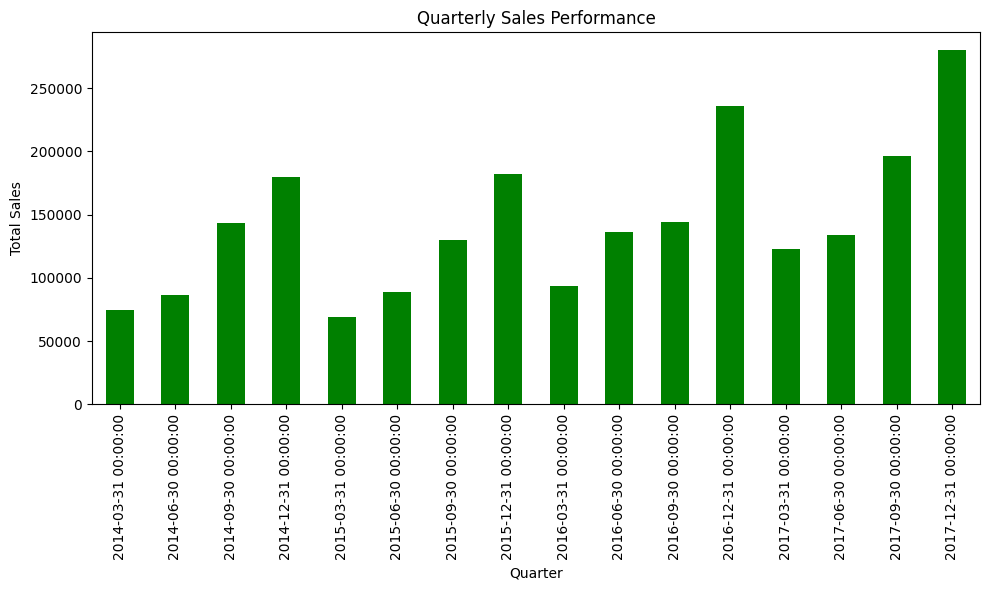

Quarterly sales more than 150000:
Order Date
2014-12-31    179627.7302
2015-12-31    182297.0082
2016-12-31    236098.7538
2017-09-30    196251.9560
2017-12-31    280054.0670
Name: Sales, dtype: float64


In [23]:
# Group data by quarter and calculate total sales for each quarter
quarterly_sales = df.resample('Q', on='Order Date')['Sales'].sum()

# Plot quarterly sales data
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar', color='green')
plt.title('Quarterly Sales Performance')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

print('Quarterly sales more than 150000:')
print(quarterly_sales[quarterly_sales > 150000])

### Observation:

- Q4 consistently shows the highest total sales across all years.
- There is a general increasing trend in total sales over the years, with occasional fluctuations between quarters.
- Q1 and Q2 of each year generally show lower total sales compared to Q3 and Q4.

### Insights:

- Businesses should anticipate higher sales during Q4 and plan their marketing and inventory strategies accordingly.
- Analyzing the factors contributing to fluctuations between quarters can help in optimizing sales performance and identifying areas for improvement.

### 7. Customer Behavior Over Time:
- Are there discernible changes in customer buying patterns over the analyzed period?
- Do certain time periods exhibit variations in the quantity of items purchased or average order value?

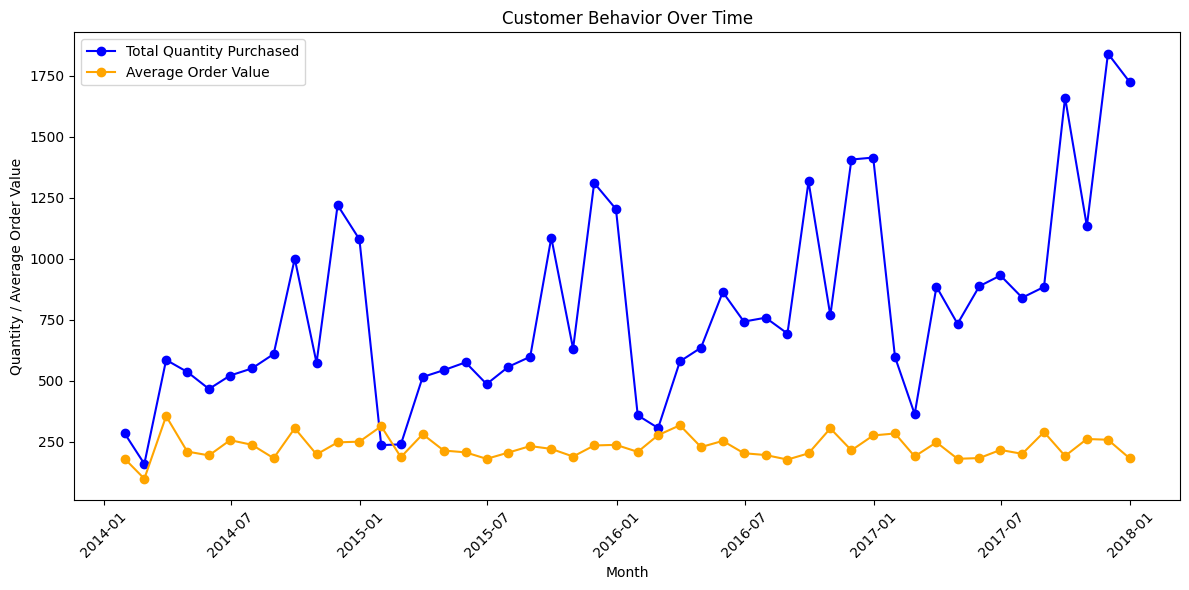

Quantity more than 1400:
Order Date
2016-11-30    1406
2016-12-31    1414
2017-09-30    1660
2017-11-30    1840
2017-12-31    1723
Name: Quantity, dtype: int64

Sales greater than 300:
Order Date
2014-03-31    354.719803
2014-09-30    305.139369
2015-01-31    313.346131
2016-03-31    317.275307
2016-10-31    304.529311
Name: Sales, dtype: float64


In [24]:
# Group data by month and calculate total quantity of items purchased and average order value for each month
monthly_customer_behavior = df.resample('M', on='Order Date').agg({'Quantity': 'sum', 'Sales': 'mean'})

# Plotting customer behavior trends over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_customer_behavior.index, monthly_customer_behavior['Quantity'], color='blue', marker='o', label='Total Quantity Purchased')
plt.plot(monthly_customer_behavior.index, monthly_customer_behavior['Sales'], color='orange', marker='o', label='Average Order Value')
plt.title('Customer Behavior Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity / Average Order Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter the data for quantity more than 1000 and sales greater than 300
high_quantity = monthly_customer_behavior[monthly_customer_behavior['Quantity'] > 1400]
high_sales = monthly_customer_behavior[monthly_customer_behavior['Sales'] > 300]

# Print the filtered data
print('Quantity more than 1400:')
print(high_quantity['Quantity'])
print('\nSales greater than 300:')
print(high_sales['Sales'])

### Observation:

- Quantity Purchased:
  - Shows fluctuations throughout the analyzed period.
  - Peaks observed in November-December 2016, October 2017 and November-December 2017.
  - Consistently higher quantities purchased in the latter half of each year.

- Average Order Value:
  - Exhibits some variability but generally maintains stability.
  - Highest average order values recorded in March 2014, January 2015 and March 2016.
  - Overall, average order values remain relatively consistent over time.

### Trends:

- Quantity purchased shows seasonal fluctuations, with peaks occurring towards the end of each year.
- Average order value remains relatively stable, with occasional spikes and dips.
- Consistent patterns of higher quantities purchased during specific months suggest potential seasonal trends.

### Insights:

- Seasonal fluctuations in quantity purchased may indicate shifts in customer demand.
- Stability in average order value suggests consistent pricing strategies.
- Further analysis into the factors driving peaks in quantity purchased during specific months could inform marketing and sales strategies.

###  8. Customer Segment Behavior:
- How do buying patterns differ among different customer segments (e.g., Consumer, Corporate, Home Office)?
- Are there specific segments that contribute more to overall sales, and do they exhibit distinct purchasing behaviors?

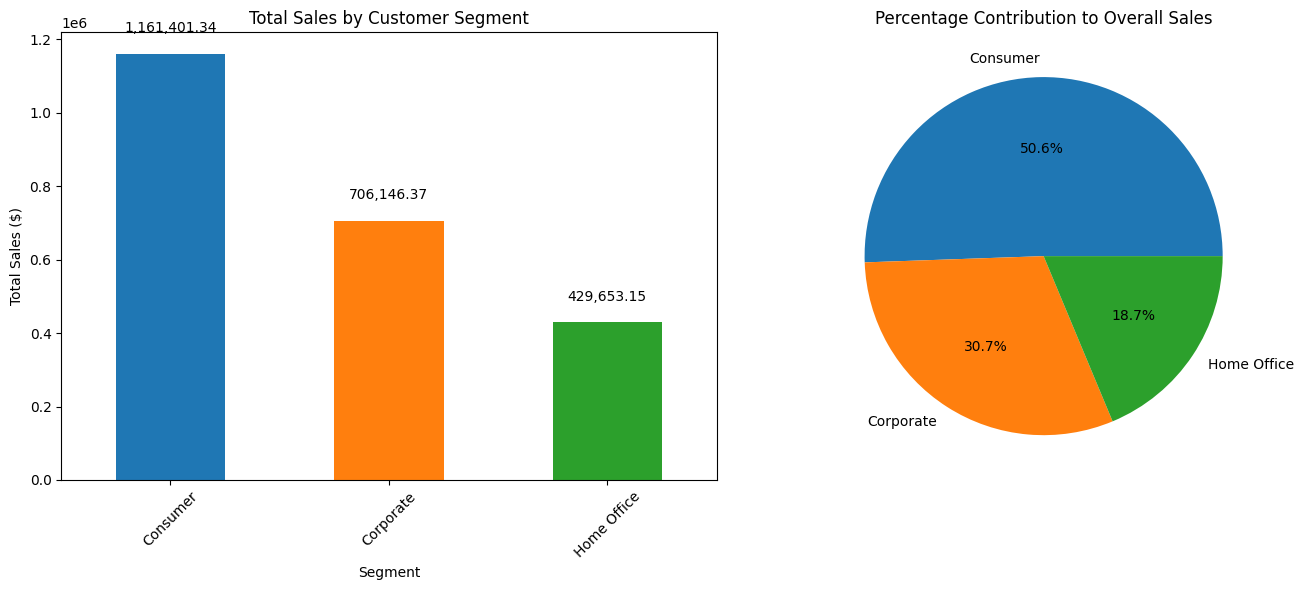

Total Sales by Segment:
Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

Percentage Contribution to Overall Sales:
Segment
Consumer       50.557240
Corporate      30.739426
Home Office    18.703334
Name: Sales, dtype: float64

Average Purchase Metrics by Segment:
                  Sales  Quantity  Discount     Profit
Segment                                               
Consumer     223.733644  3.760547  0.158141  25.836873
Corporate    233.823300  3.843709  0.158228  30.456667
Home Office  240.972041  3.782389  0.147128  33.818664


In [34]:
# Grouping the data by customer segment and calculating total sales for each segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Format total sales to be more readable
segment_sales_readable = segment_sales.apply(lambda x: '{:,.2f}'.format(x))

# Calculate the percentage contribution of each segment to overall sales
segment_sales_percentage = segment_sales / df['Sales'].sum() * 100

# Average purchase metrics by segment
segment_purchasing_behavior = df.groupby('Segment').agg({'Sales': 'mean', 'Quantity': 'mean', 'Discount': 'mean', 'Profit': 'mean'})

# Plotting total sales by segment
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
segment_sales_plot = segment_sales.plot(kind='bar', color=['#1F77B4', '#FF7F0E', '#2CA02C'])
segment_sales_plot.set_title('Total Sales by Customer Segment')
segment_sales_plot.set_xlabel('Segment')
segment_sales_plot.set_ylabel('Total Sales ($)')
segment_sales_plot.set_xticklabels(segment_sales.index, rotation=45)
for i, v in enumerate(segment_sales):
    segment_sales_plot.text(i, v + 50000, str(segment_sales_readable[i]), ha='center', va='bottom')

# Plotting percentage contribution to overall sales
plt.subplot(1, 2, 2)
segment_sales_percentage_plot = segment_sales_percentage.plot(kind='pie', autopct='%1.1f%%')
segment_sales_percentage_plot.set_title('Percentage Contribution to Overall Sales')
segment_sales_percentage_plot.set_ylabel('')

plt.tight_layout()
plt.show()

print("Total Sales by Segment:")
print(segment_sales)
print("\nPercentage Contribution to Overall Sales:")
print(segment_sales_percentage)
print("\nAverage Purchase Metrics by Segment:")
print(segment_purchasing_behavior)

### Observation:

- Consumer segment contributes the highest total sales (\\$1,161,401), followed by Corporate (\\$706,146) and Home Office (\\$429,653).
- Consumer segment has the highest percentage contribution to overall sales (50.56\%), followed by Corporate (30.74\%) and Home Office (18.70\%).
- Average purchase metrics by segment show slight variations:
    - Home Office has the highest average sales (\\$240.97), followed by Corporate (\\$233.82) and Consumer (\\$223.73).
    - Home Office also has the highest average profit (\\$33.82), followed by Corporate (\\$30.46) and Consumer (\\$25.84).
    - However, Consumer segment has the lowest average discount rate (15.81\%), followed by Corporate (15.82\%) and Home Office (14.71\%).


### Trends:

- Consumer segment dominates in terms of total sales and percentage contribution to overall sales, indicating its significant impact on the business.
- Despite differences in average sales and profits, the three segments exhibit relatively similar purchasing behaviors, with minor variations in discount rates.

### Insights:

- The Consumer segment is crucial for overall sales, indicating the importance of tailoring marketing strategies and product offerings to consumer preferences.
- Understanding the factors influencing variations in average sales and profits can help optimize pricing strategies and improve profitability across all segments.
- While Home Office segment shows higher average sales and profits, further analysis is needed to determine the underlying reasons and potential strategies for enhancing profitability in other segments.

### 9. Regional Sales Disparity:
- Is there significant variation in sales performance across different regions?
- Do certain regions consistently contribute more to overall sales, and are there underlying factors driving this discrepancy? 

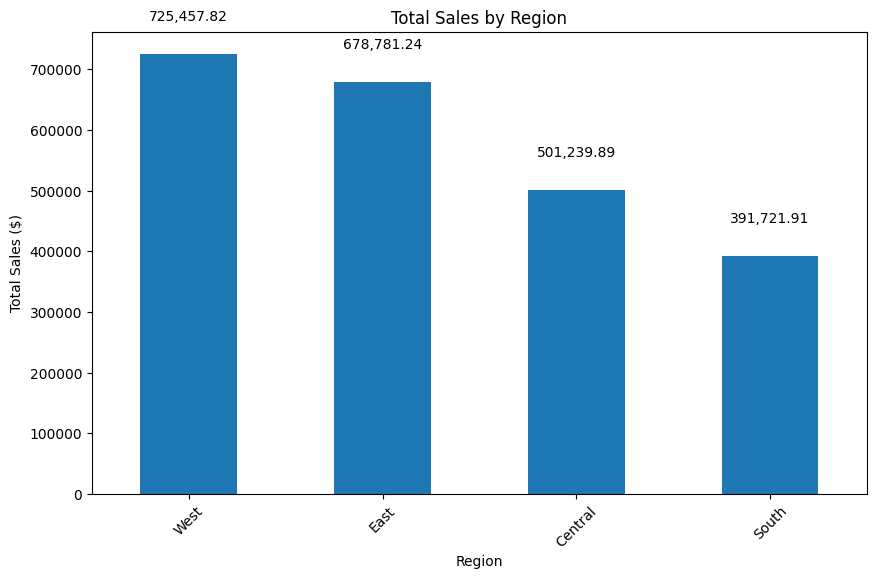

Regional Sales Disparity:
Total Sales by Region:
Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


In [26]:
# Grouping the data by region and calculating total sales for each region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotting total sales by region
plt.figure(figsize=(10, 6))
region_sales_plot = region_sales.plot(kind='bar')
region_sales_plot.set_title('Total Sales by Region')
region_sales_plot.set_xlabel('Region')
region_sales_plot.set_ylabel('Total Sales ($)')
region_sales_plot.set_xticklabels(region_sales.index, rotation=45)
for i, v in enumerate(region_sales):
    region_sales_plot.text(i, v + 50000, '{:,.2f}'.format(v), ha='center', va='bottom')
plt.show()

# Displaying total sales by region
print("Regional Sales Disparity:")
print("Total Sales by Region:")
print(region_sales)

### Observation:

- The West region has the highest total sales, followed closely by the East region, while the Central and South regions have comparatively lower total sales.
  
### Trends:

- There is a clear disparity in total sales among the different regions, with the West and East regions leading in sales volume.
- The Central and South regions exhibit lower total sales compared to the West and East regions.

### Insights:

- Analyzing the factors contributing to the higher sales in the West and East regions could provide insights into successful sales strategies that can be replicated in other regions.
- Exploring potential reasons for the lower sales in the Central and South regions could help identify areas for improvement and targeted marketing efforts to boost sales in those regions.

### 10. Product Category Performance:
- How does the sales performance vary among different product categories?
- Are there categories that consistently outperform others and what factors might contribute to this trend?

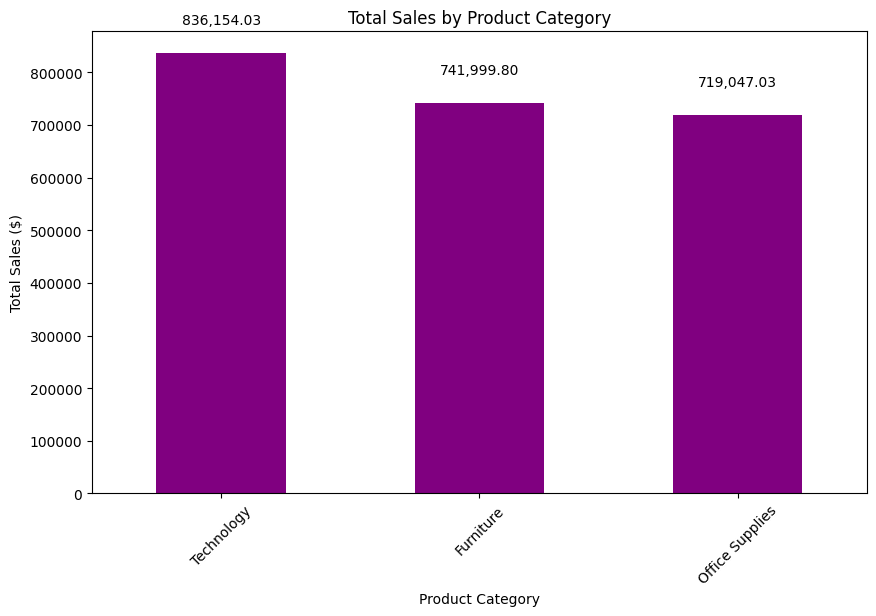

Product Category Performance:
Total Sales by Product Category:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


In [27]:
# Grouping the data by product category and calculating total sales for each category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plotting total sales by product category
plt.figure(figsize=(10, 6))
category_sales_plot = category_sales.plot(kind='bar', color = 'purple')
category_sales_plot.set_title('Total Sales by Product Category')
category_sales_plot.set_xlabel('Product Category')
category_sales_plot.set_ylabel('Total Sales ($)')
category_sales_plot.set_xticklabels(category_sales.index, rotation=45)
for i, v in enumerate(category_sales):
    category_sales_plot.text(i, v + 50000, '{:,.2f}'.format(v), ha='center', va='bottom')
plt.show()

# Displaying total sales by product category
print("Product Category Performance:")
print("Total Sales by Product Category:")
print(category_sales)

### Observation:

- **Technology** category exhibits the highest total sales, followed by **Furniture** and **Office Supplies**.
  
### Trends:

- Technology products consistently outperform other categories in terms of total sales.
- Furniture and Office Supplies categories show relatively similar sales figures, with Furniture slightly outperforming Office Supplies.

### Insights:

- The dominance of the Technology category suggests strong demand for tech-related products, potentially driven by advancements in technology and consumer preferences.
- Understanding the factors contributing to the popularity of Technology products can inform marketing strategies and inventory management to further capitalize on this trend.
- Analyzing sales patterns within each category can help identify best-selling products and optimize product offerings to maximize sales and profitability.

### 11. Order Processing Time Across Months 

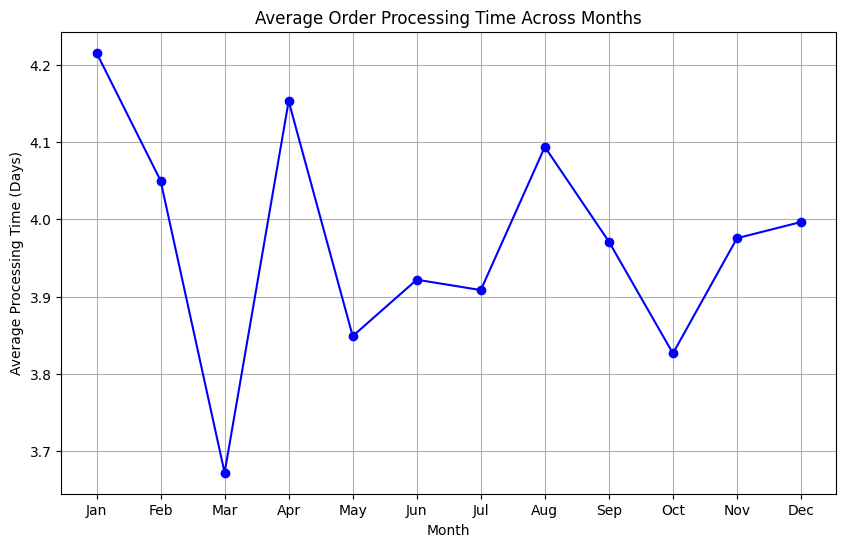

Monthly average processing time more than 4
Order Date
1    4.215223
2    4.050000
4    4.152695
8    4.093484
Name: Order Processing Time, dtype: float64


In [22]:
# Calculate order processing time
df['Order Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by month and calculate average order processing time
monthly_avg_processing_time = df.groupby(df['Order Date'].dt.month)['Order Processing Time'].mean()

# Plotting the trend of average order processing time over months
plt.figure(figsize=(10, 6))
monthly_avg_processing_time.plot(kind='line', color='blue', marker='o')
plt.title('Average Order Processing Time Across Months')
plt.xlabel('Month')
plt.ylabel('Average Processing Time (Days)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

print('Monthly average processing time more than 4')
print(monthly_avg_processing_time[monthly_avg_processing_time > 4])

### Observation:

- March: Shows the lowest average processing time, indicating peak efficiency.
- January and April: Witness slightly higher processing times compared to other months.
- June to July: Reflect consistent processing times, suggesting stable operations.
- September and October: Indicates a moderate decrease in processing time compared to previous month.

### Trends:

- Fluctuations in processing time occur across different months.
- March consistently demonstrates the lowest processing time, suggesting potential efficiency optimizations.
- Variations in processing time highlight potential factors influencing efficiency.

### Insights:

- Analyzing reasons behind fluctuations can inform process optimizations and reduce delays.
- Emulating strategies from months with lower processing times can improve overall efficiency.

### 12. Customer Retention and Loyalty:
- What is the rate of repeat purchases among customers over time?
- Are there strategies or factors that contribute to higher customer retention and loyalty? 

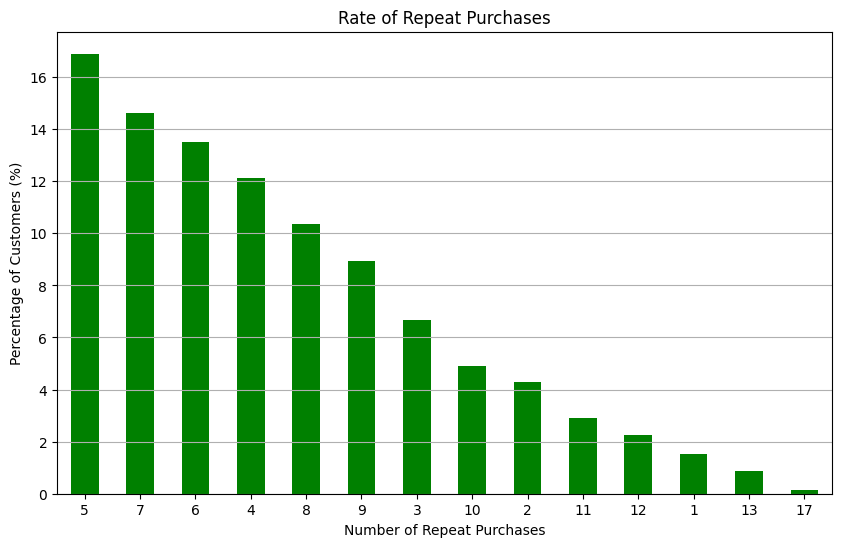

Customer Retention and Loyalty Analysis:
Rate of Repeat Purchases:
5     16.897856
7     14.627995
6     13.493064
4     12.105927
8     10.340479
9      8.953342
3      6.683480
10     4.918033
2      4.287516
11     2.900378
12     2.269861
1      1.513241
13     0.882724
17     0.126103
Name: Order ID, dtype: float64


In [28]:
# Grouping the data by customer ID and counting the number of orders for each customer
customer_orders = df.groupby('Customer ID')['Order ID'].nunique()

# Calculating the rate of repeat purchases over time
repeat_purchase_rate = customer_orders.value_counts() / len(customer_orders) * 100

# Plotting the rate of repeat purchases
plt.figure(figsize=(10, 6))
repeat_purchase_rate_plot = repeat_purchase_rate.plot(kind='bar', color='green')
repeat_purchase_rate_plot.set_title('Rate of Repeat Purchases')
repeat_purchase_rate_plot.set_xlabel('Number of Repeat Purchases')
repeat_purchase_rate_plot.set_ylabel('Percentage of Customers (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Displaying the rate of repeat purchases
print("Customer Retention and Loyalty Analysis:")
print("Rate of Repeat Purchases:")
print(repeat_purchase_rate)

### Observation:

- The majority of customers have a relatively low rate of repeat purchases, with around 16.9% of customers making 5 repeat purchases.
- There is a gradual decrease in the percentage of customers as the number of repeat purchases increases, indicating lower customer retention with higher repeat purchase counts.
- Only a small percentage of customers exhibit high loyalty, with less than 1% of customers making 13 or more repeat purchases.

### Trends:

- A significant portion of customers make a small number of repeat purchases, suggesting a potential need for strategies to encourage repeat business.
- The declining trend in the percentage of customers with higher repeat purchase counts implies challenges in maintaining long-term customer loyalty.
  
### Insights:

- Implementing loyalty programs or incentives to encourage repeat purchases could help increase customer retention.
- Understanding the factors contributing to the decline in repeat purchase rates among loyal customers can guide efforts to enhance customer satisfaction and loyalty.

### 13. Shipping Mode Preferences:
- Do customers exhibit preferences for specific shipping modes, and how does this impact overall satisfaction and repeat purchases?
- Are there shipping modes that are more cost-effective or efficient for the business? 

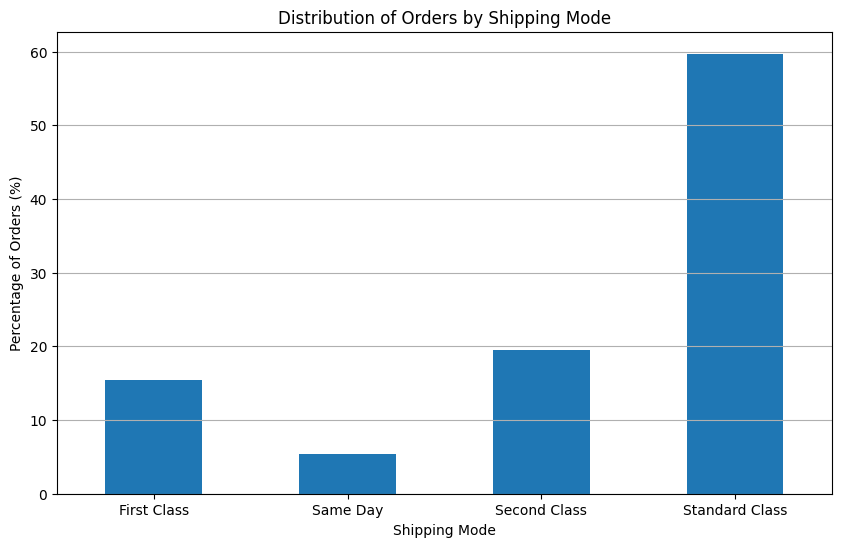

Shipping Mode Preferences Analysis:
Distribution of Orders by Shipping Mode:
Ship Mode
First Class       15.389234
Same Day           5.433260
Second Class      19.461677
Standard Class    59.715829
Name: Order ID, dtype: float64


In [29]:
# Grouping the data by shipping mode and counting the number of orders for each mode
shipping_orders = df.groupby('Ship Mode')['Order ID'].count()

# Calculating the percentage distribution of orders for each shipping mode
shipping_mode_distribution = shipping_orders / shipping_orders.sum() * 100

# Plotting the distribution of orders by shipping mode
plt.figure(figsize=(10, 6))
shipping_mode_distribution_plot = shipping_mode_distribution.plot(kind='bar')
shipping_mode_distribution_plot.set_title('Distribution of Orders by Shipping Mode')
shipping_mode_distribution_plot.set_xlabel('Shipping Mode')
shipping_mode_distribution_plot.set_ylabel('Percentage of Orders (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Displaying the distribution of orders by shipping mode
print("Shipping Mode Preferences Analysis:")
print("Distribution of Orders by Shipping Mode:")
print(shipping_mode_distribution)

### Observation:

- The majority of orders, approximately 59.7%, are shipped using the Standard Class mode, indicating its popularity among customers.
- Second Class shipping accounts for around 19.5% of orders, making it the second most preferred option.
- First Class and Same Day shipping modes have lower percentages, with approximately 15.4% and 5.4% of orders, respectively.

### Trends:

- Standard Class shipping is the most commonly chosen option, suggesting that customers prioritize cost-efficiency and are willing to wait longer for delivery.
- Same Day shipping, while the fastest option, is selected for a relatively small percentage of orders, indicating that customers may prioritize speed only for urgent shipments.

### Insights:

- The popularity of Standard Class shipping highlights the importance of offering cost-effective shipping options to meet customer expectations.
- Understanding the factors influencing shipping mode preferences can help optimize logistics and improve overall customer satisfaction.

### 14. Profitability by Product:
- Which products contribute the most to overall profitability and what attributes or characteristics make them more profitable?
- Are there product lines that are consistently more profitable than others? 

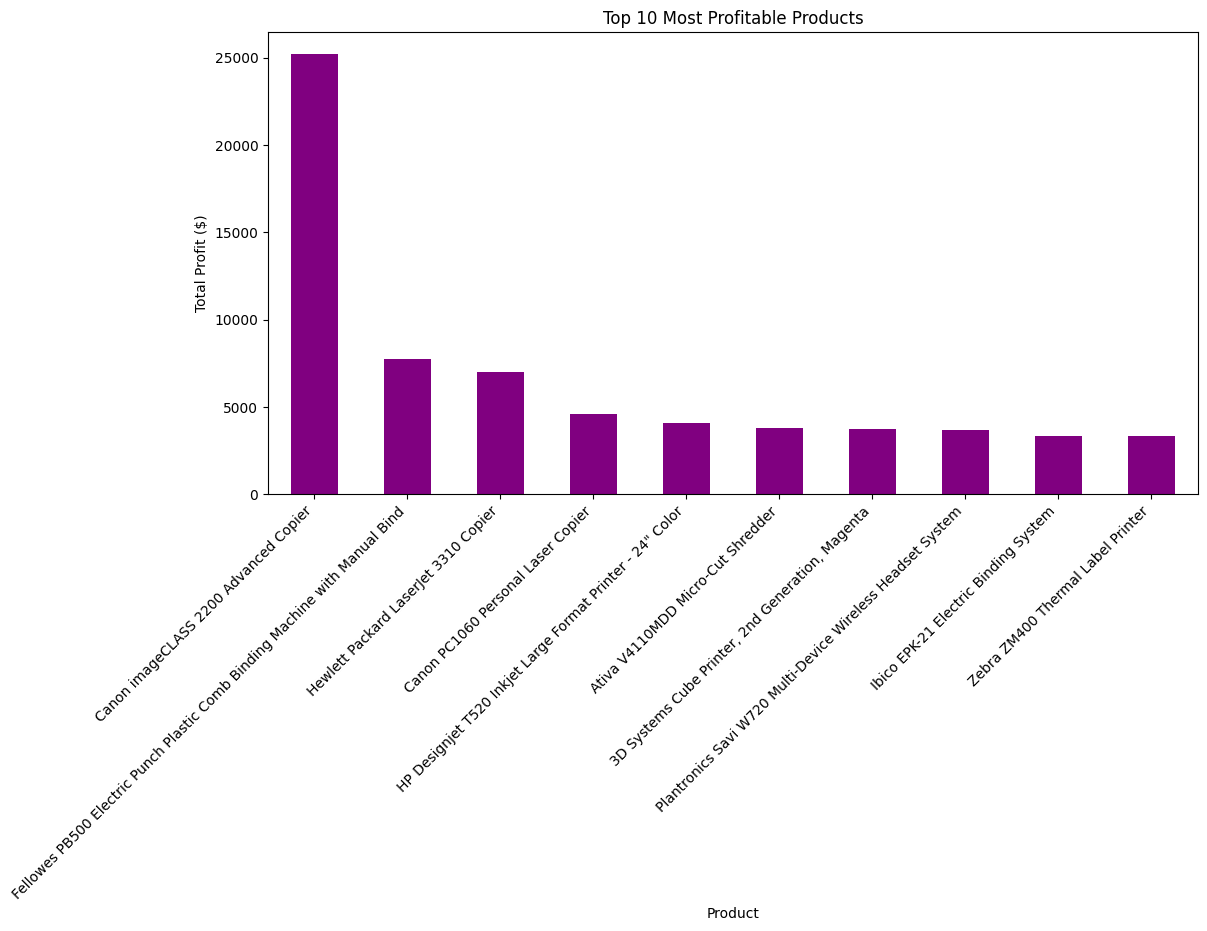

Top profitable products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


In [30]:
# Grouping the data by product and calculating total profit for each product
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

# Storing the top 10 most profitable products
top_profitable_products = product_profit.head(10)

# Plotting the top 10 most profitable products
plt.figure(figsize=(12, 6))
top_profitable_products_plot = top_profitable_products.plot(kind='bar', color='purple')
top_profitable_products_plot.set_title('Top 10 Most Profitable Products')
top_profitable_products_plot.set_xlabel('Product')
top_profitable_products_plot.set_ylabel('Total Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Displaying the top 10 most profitable products
print("Top profitable products:")
print(top_profitable_products)

### Observation:

- The top 10 most profitable products include high-value items such as copiers, printers, shredders and binding systems.
- Canon imageCLASS 2200 Advanced Copier is the most profitable product, generating a total profit of \\$25,199.93.
- The profitability of these products suggests that they have unique attributes or characteristics that make them more desirable or valuable to customers.

### Trends:

- Products related to office equipment and technology appear to be consistently more profitable compared to other product categories.
- High-profit items like copiers and printers may indicate a demand for quality and reliable office machinery among customers.
- The presence of specific brands like Canon, Fellowes and Hewlett Packard among the top profitable products suggests that brand reputation and product quality contribute to profitability.

### Insights:

- Analyzing the attributes and features of top-performing products can provide insights into customer preferences and market demand.
- Offering a diverse range of high-profit products and promoting top brands can help drive overall profitability and customer satisfaction.
- Continuously monitoring the performance of top-profit products and adjusting strategies accordingly can optimize profitability and enhance business success.

In [31]:
df.to_csv('CleanedSuperstoreSales.csv', index=False)